```
[x1, Fs1] = audioread('mix1.wav');
[x2, Fs2] = audioread('mix2.wav');
xx = [x1, x2]';
yy = sqrtm(inv(cov(xx')))*(xx-repmat(mean(xx,2),1,size(xx,2)));
[W,s,v] = svd((repmat(sum(yy.*yy,1),size(yy,1),1).*yy)*yy');

a = W*xx; %W is unmixing matrix
subplot(2,2,1); plot(x1); title('mixed audio - mic 1');
subplot(2,2,2); plot(x2); title('mixed audio - mic 2');
subplot(2,2,3); plot(a(1,:), 'g'); title('unmixed wave 1');
subplot(2,2,4); plot(a(2,:),'r'); title('unmixed wave 2');

audiowrite('unmixed1.wav', a(1,:), Fs1);
audiowrite('unmixed2.wav', a(2,:), Fs1);
```

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from scipy import linalg
import numpy as np
import numpy.matlib

In [2]:
data_dir = './medias/'
first_file  = 'mix1.wav'
second_file = 'mix2.wav'

In [3]:
sample_rate, x1 = wavfile.read(data_dir + first_file)
#x1 = x1[0:5000]
Audio(x1, rate=sample_rate)

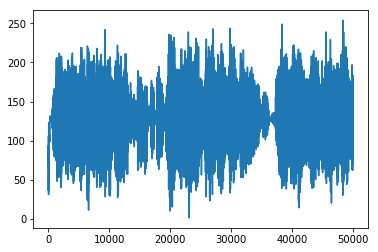

In [4]:
plt.plot(x1)
plt.show()

In [5]:
sample_rate, x2 = wavfile.read(data_dir + second_file)
#x2 = x2[0:5000]
Audio(x2, rate=sample_rate)

In [6]:
x1 = x1.reshape(1,-1)
x2 = x2.reshape(1,-1)
x = np.concatenate((x1,x2))
x.shape

(2, 50000)

```
y = sqrtm(inv(cov(xx')))*(xx-repmat(mean(xx,2),1,size(xx,2)));
```

In [7]:
sqrt = linalg.sqrtm(linalg.inv(np.cov(x)))
mean = np.mean(x, axis = 1, keepdims=True)
xt   = np.matlib.repmat(mean, 1, x.shape[1])
y    = np.matmul(sqrt, (x - xt))
y.shape

(2, 50000)

```
svd((repmat(sum(yy.*yy,1),size(yy,1),1).*yy)*yy');
```

In [8]:
ys = np.multiply(y,y)
ysum = np.sum(ys, 0, keepdims=True)
ym = np.matlib.repmat(ysum, y.shape[0], 1)
svd_value = np.matmul(np.multiply(ym, y),y.T)
svd_value.shape

(2, 2)

In [9]:
W,s,V = linalg.svd(svd_value)

In [10]:
a = np.matmul(W,x)

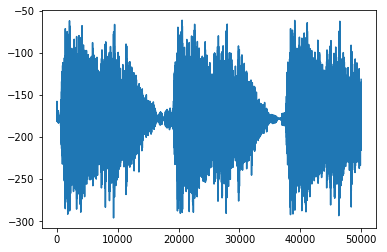

In [11]:
plt.plot(a[0,:])
plt.show()

In [12]:
Audio(a[0,:], rate=sample_rate)

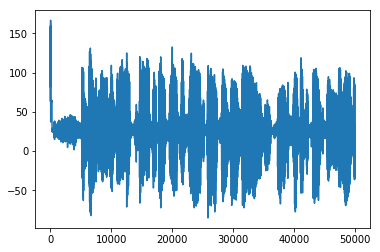

In [13]:
plt.plot(a[1,:])
plt.show()

In [14]:
Audio(a[1,:], rate=sample_rate)